## 1. Setup and import ##

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_health_indicators_BRFSS2015.csv to heart_disease_health_indicators_BRFSS2015.csv


## 2. Load Dataset ##

In [33]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [34]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [35]:
df = df.rename(columns={'HeartDiseaseorAttack':'cardiac_arrest'})

#### 2.1. Data Cleaning


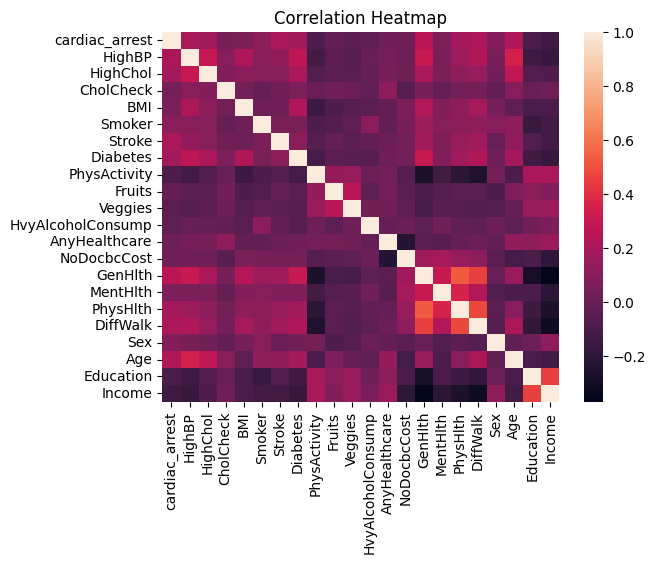

<Figure size 640x480 with 0 Axes>

In [36]:
# Visualize Correlation Heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix)
plt.title("Correlation Heatmap")
plt.show()
plt.savefig('Coorelation_heatmap.png')

In [37]:
df = df.drop(columns=['AnyHealthcare', 'Education', 'Income'], axis=1)
df.shape

(253680, 19)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cardiac_arrest     253680 non-null  float64
 1   HighBP             253680 non-null  float64
 2   HighChol           253680 non-null  float64
 3   CholCheck          253680 non-null  float64
 4   BMI                253680 non-null  float64
 5   Smoker             253680 non-null  float64
 6   Stroke             253680 non-null  float64
 7   Diabetes           253680 non-null  float64
 8   PhysActivity       253680 non-null  float64
 9   Fruits             253680 non-null  float64
 10  Veggies            253680 non-null  float64
 11  HvyAlcoholConsump  253680 non-null  float64
 12  NoDocbcCost        253680 non-null  float64
 13  GenHlth            253680 non-null  float64
 14  MentHlth           253680 non-null  float64
 15  PhysHlth           253680 non-null  float64
 16  Di

In [39]:
# Data Stats
df['cardiac_arrest'].value_counts()

0.0    229787
1.0     23893
Name: cardiac_arrest, dtype: int64

In [40]:
#specify features and target columns
target = df['cardiac_arrest']
features = df.drop(columns='cardiac_arrest', axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HighBP             253680 non-null  float64
 1   HighChol           253680 non-null  float64
 2   CholCheck          253680 non-null  float64
 3   BMI                253680 non-null  float64
 4   Smoker             253680 non-null  float64
 5   Stroke             253680 non-null  float64
 6   Diabetes           253680 non-null  float64
 7   PhysActivity       253680 non-null  float64
 8   Fruits             253680 non-null  float64
 9   Veggies            253680 non-null  float64
 10  HvyAlcoholConsump  253680 non-null  float64
 11  NoDocbcCost        253680 non-null  float64
 12  GenHlth            253680 non-null  float64
 13  MentHlth           253680 non-null  float64
 14  PhysHlth           253680 non-null  float64
 15  DiffWalk           253680 non-null  float64
 16  Se

### 2.2. Data Preprocessing

#### 2.2.1. Data Scaling ####

**MinMaxScaler** is a data normalization technique commonly used in machine learning and data preprocessing.
It is applied to feature scaling, which aims to transform numerical data into a specific range.
MinMaxScaler scales the data in such a way that it maps the minimum and maximum values of the feature to a specified range, typically between 0 and 1. <br>
MinMaxScaler ensures that all values of a feature fall within the specified range, making it suitable for algorithms that rely on the assumption that the features are on a similar scale. This scaling technique can be particularly useful for algorithms such as support vector machines (SVM), k-nearest neighbors (KNN), and artificial neural networks (ANN) that use distance-based calculations or rely on gradient descent optimization.


In [41]:
# Data Scaling or Normalization
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)



#### 2.2.2. Data Splitting ####


In [42]:
# x_train and x_test is the split of features between training and testing
  # x_test will contain 20 percent of the data split from x_train
  # y_train and y_test is the split between training and testing of the target variable
x_train, x_test, y_train, y_test = train_test_split(scaled_features, target, stratify=target, test_size=0.3)

### 3. Build The Neural Network ###

- We have to convert the training data shape into 2D because convolutional layer requires a 2D data vector
- use **x_train.shape** method to check the shape of an array
- in the output shape (none, 15, 10) the last number shows filters

In [43]:
x_train_2d = np.expand_dims(x_train, axis=2)  #expand dims from 1D to 2D bcz of CONV1D layer
n_timesteps, n_features = x_train_2d.shape[1], x_train_2d.shape[2]
# CNN Initialization
model=Sequential()
model.add(Conv1D(filters=10,kernel_size=2,activation="relu",input_shape=(n_timesteps,n_features)))  # input_shape = 18x1
#CNN Pooling
model.add(MaxPooling1D(pool_size=2))
#Fully connected Layer
model.add(Dense(25, activation="relu"))
## my addition
model.add(Conv1D(filters=16, kernel_size=2, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dense(34, activation="relu"))

model.add(Conv1D(filters=15, kernel_size=3, activation="relu"))
model.add(Dense(45, activation="relu"))

model.add(Flatten())
#Decision Layer
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 17, 10)            30        
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 8, 10)            0         
 1D)                                                             
                                                                 
 dense_8 (Dense)             (None, 8, 25)             275       
                                                                 
 conv1d_7 (Conv1D)           (None, 7, 16)             816       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 3, 16)            0         
 1D)                                                             
                                                                 
 dense_9 (Dense)             (None, 3, 34)            

In [44]:
# model compile
model.compile(loss = 'binary_crossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate=0.020),
                metrics = ['accuracy'])

In [45]:
# Fit the model
# verbose=0 is used to hide the training steps
history = model.fit(x_train_2d, y_train,validation_split=0.34,shuffle=True,epochs=9,batch_size=64)

Epoch 1/9
1832/1832 [==============================] - 11s 5ms/step - loss: 0.2767 - accuracy: 0.9059 - val_loss: 0.2672 - val_accuracy: 0.9047
Epoch 2/9
1832/1832 [==============================] - 9s 5ms/step - loss: 0.2653 - accuracy: 0.9064 - val_loss: 0.2658 - val_accuracy: 0.9047
Epoch 3/9
1832/1832 [==============================] - 10s 6ms/step - loss: 0.2629 - accuracy: 0.9062 - val_loss: 0.2620 - val_accuracy: 0.9047
Epoch 4/9
1832/1832 [==============================] - 9s 5ms/step - loss: 0.2633 - accuracy: 0.9064 - val_loss: 0.2623 - val_accuracy: 0.9047
Epoch 5/9
1832/1832 [==============================] - 9s 5ms/step - loss: 0.2632 - accuracy: 0.9061 - val_loss: 0.2663 - val_accuracy: 0.9047
Epoch 6/9
1832/1832 [==============================] - 9s 5ms/step - loss: 0.2637 - accuracy: 0.9062 - val_loss: 0.2684 - val_accuracy: 0.9047
Epoch 7/9
1832/1832 [==============================] - 9s 5ms/step - loss: 0.2620 - accuracy: 0.9062 - val_loss: 0.2734 - val_accuracy: 0.90

## 4. Evaluating the Model ##


In [56]:
model.save('Cardiac_arrest_classifier.h5')

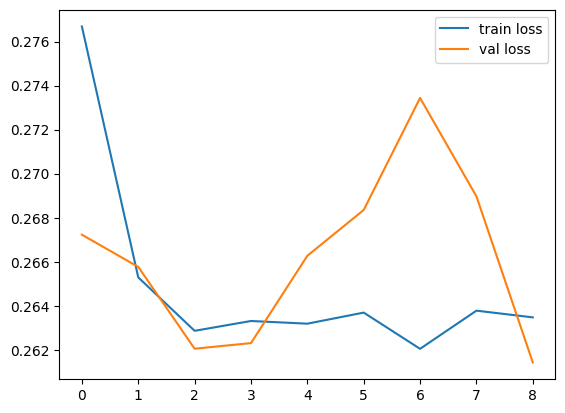

<Figure size 640x480 with 0 Axes>

In [46]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss')

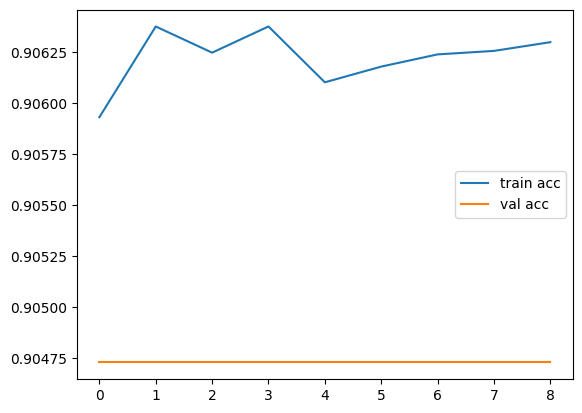

<Figure size 640x480 with 0 Axes>

In [47]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Accuracy')

In [48]:
y_pred = model.predict(np.expand_dims(x_test,axis=2))
print("CNN Accuracy: ",accuracy_score(y_test, y_pred.round()))

2379/2379 [==============================] - 4s 2ms/step
CNN Accuracy:  0.905813097866078


In [55]:
# Apply threshold (e.g., 0.5) to get predicted class labels
predicted_labels = [1 if p >= 0.2 else 0 for p in y_pred]

# Calculate classification report
report = classification_report(y_test, predicted_labels)

print(report)

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92     68936
         1.0       0.30      0.43      0.35      7168

    accuracy                           0.85     76104
   macro avg       0.62      0.66      0.63     76104
weighted avg       0.88      0.85      0.86     76104



2379/2379 [==============================] - 4s 2ms/step


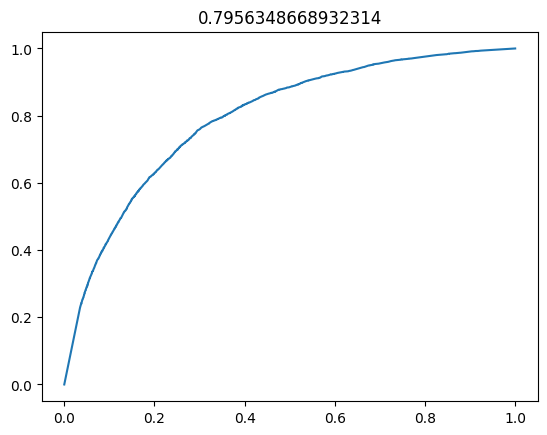

<Figure size 640x480 with 0 Axes>

In [23]:
tpr, fpr, th = roc_curve(y_test, model.predict(np.expand_dims(x_test,axis=2)))
plt.plot(tpr,fpr)
plt.title(roc_auc_score(y_test, model.predict(np.expand_dims(x_test,axis=2))))
plt.show()
plt.savefig('roc_curve')